In [1]:
from magprime import utility
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load CRM data from MAGPRIME
B = utility.load_crm_data()

# Seperate into individual channels
bx = B[0,:]
by = B[1,:]
bz = B[2,:]

# Generate time array
fs = 200 # Sampling rate
bt = np.arange(len(bx)) / fs # Time from start, in seconds

c:\ProgramData\Anaconda3\envs\latest\Lib\site-packages\pymssa\mssa.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


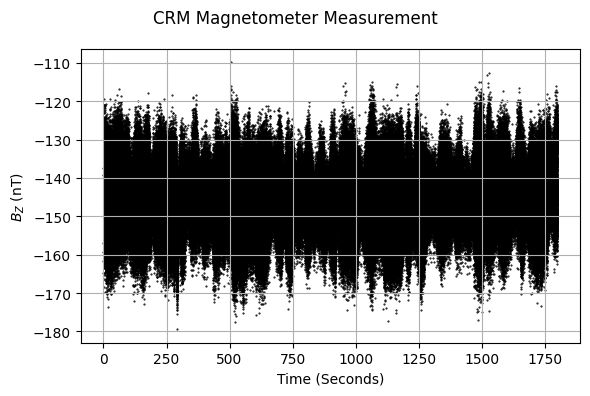

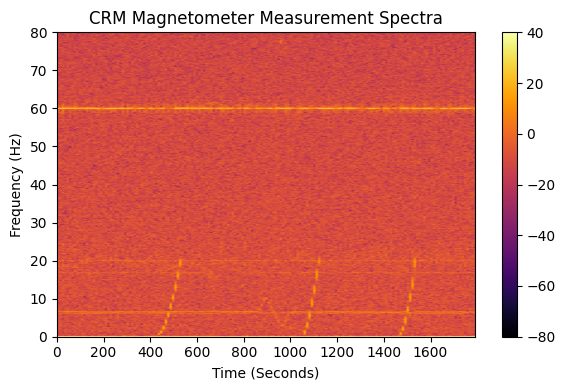

In [2]:
# Time Series Display
plt.figure(figsize=(6,4))
plt.scatter(bt, bz, s=1, marker='.', color='black')
plt.ylabel('$B_{Z}$ (nT)')
plt.xlabel('Time (Seconds)')
plt.grid()
plt.suptitle('CRM Magnetometer Measurement')
plt.tight_layout()
plt.show()

# Set some parameters to use in spectrogram generation
n_overlap = 0
scale_type = 'dB'
n_fft = 2048
clim_upper = 40
clim_lower = -80

# Spectrogram generation and display
plt.figure(figsize=(6,4))
sz, fz, tz, imz = plt.specgram(bz, NFFT=n_fft, Fs=fs, noverlap=n_overlap, scale=scale_type, cmap='inferno')
plt.ylim(0, 80)
plt.clim(clim_lower, clim_upper)
plt.colorbar()
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('CRM Magnetometer Measurement Spectra')
plt.tight_layout()
plt.show()


# Anomaly Detection-Based Spectral Track Detection

In [4]:
from magprime.algorithms.spectral import AnomalyTracker
# Apply RUDE-based detection of spectral tracks on Z component of magnetic field
rude_detections = AnomalyTracker.anomaly_tracker(sz, window_length=3, nu=0.05)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.imshow(sz, origin='lower', cmap='inferno', norm=LogNorm(vmin=0.01, vmax=1))
plt.gca().set_aspect('auto')
plt.colorbar()
plt.title('Original Data')
plt.ylabel('Frequency Bin')
plt.subplot(212)
plt.imshow(rude_detections, origin='lower', cmap='bone')
plt.gca().set_aspect('auto')
plt.colorbar()
plt.title('Anomaly-Based Spectral Track Detection')
plt.ylabel('Frequency Bin')
plt.xlabel('Time Bin')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'magprime.algorithms.anomaly.EventDetector'

# Likelihood Ratio-Based Spectral Track Detection

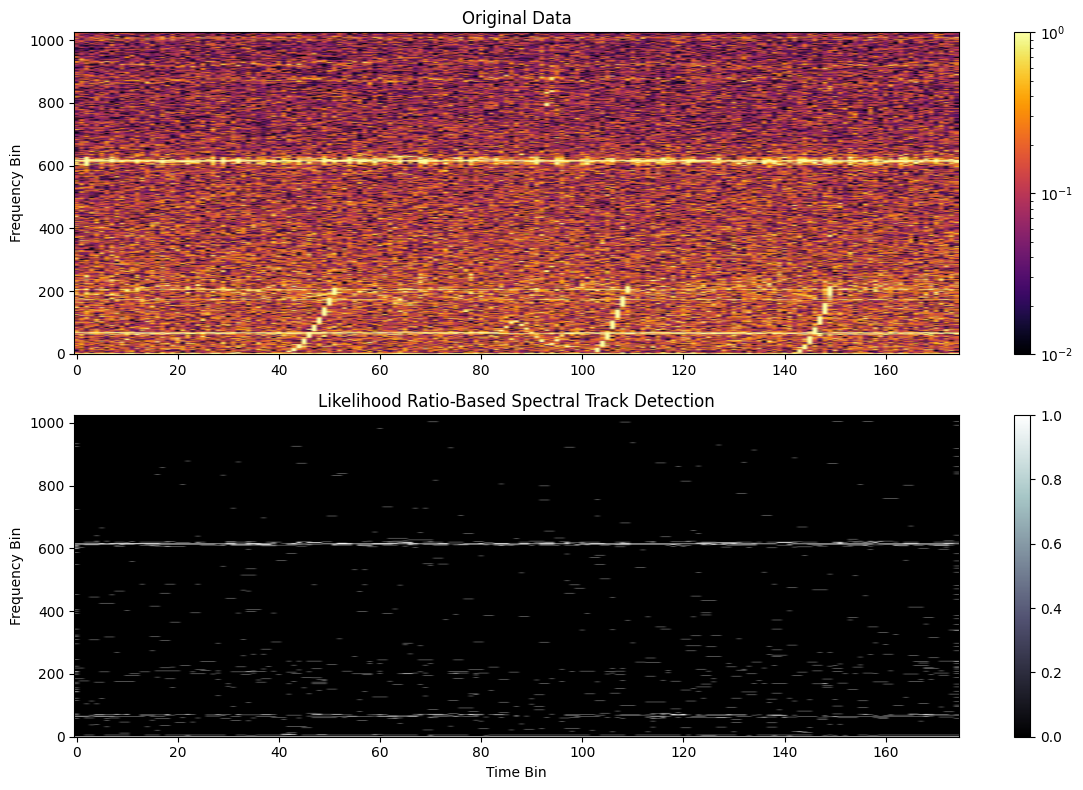

In [44]:
from magprime.algorithms.spectral import LikelihoodRatio

lr_detections = LikelihoodRatio.likelihood_ratio(np.log10(sz), 1)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.imshow(sz, origin='lower', cmap='inferno', norm=LogNorm(vmin=0.01, vmax=1))
plt.gca().set_aspect('auto')
plt.colorbar()
plt.title('Original Data')
plt.ylabel('Frequency Bin')
plt.subplot(212)
plt.imshow(lr_detections, origin='lower', cmap='bone')
plt.gca().set_aspect('auto')
plt.colorbar()
plt.title('Likelihood Ratio-Based Spectral Track Detection')
plt.ylabel('Frequency Bin')
plt.xlabel('Time Bin')
plt.tight_layout()
plt.show()